In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

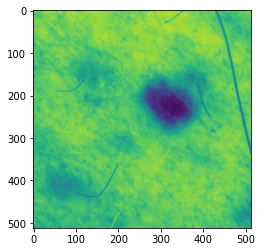

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

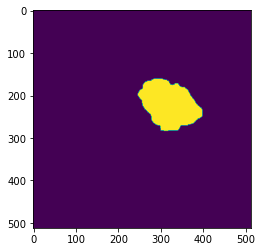

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpkbowzjo3kuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpkbowzjo3kuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 10

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 38s 688ms/step - loss: 0.6437 - dice_coeff: 0.2978 - val_loss: 0.5663 - val_dice_coeff: 0.3304
Epoch 2/100
39/39 [==============================] - 19s 495ms/step - loss: 0.5186 - dice_coeff: 0.3192 - val_loss: 0.4892 - val_dice_coeff: 0.3845
Epoch 3/100
39/39 [==============================] - 19s 487ms/step - loss: 0.4685 - dice_coeff: 0.3855 - val_loss: 0.4672 - val_dice_coeff: 0.3997
Epoch 4/100
39/39 [==============================] - 19s 484ms/step - loss: 0.4529 - dice_coeff: 0.4049 - val_loss: 0.4661 - val_dice_coeff: 0.4199
Epoch 5/100
39/39 [==============================] - 19s 484ms/step - loss: 0.4480 - dice_coeff: 0.4139 - val_loss: 0.4496 - val_dice_coeff: 0.4241
Epoch 6/100
39/39 [==============================] - 19s 495ms/step - loss: 0.4446 - dice_coeff: 0.4108 - val_loss: 0.4557 - val_dice_coeff: 0.4239
Epoch 7/100
39/39 [==============================] - 19s 487ms/step - loss: 0.4485 - dice_coeff: 0.41

62/62 [==============================] - 25s 409ms/step - loss: 0.2695 - dice_coeff: 0.7122 - val_loss: 0.2373 - val_dice_coeff: 0.7531
Epoch 21/100
62/62 [==============================] - 25s 409ms/step - loss: 0.2658 - dice_coeff: 0.7154 - val_loss: 0.2404 - val_dice_coeff: 0.7339
Epoch 22/100
62/62 [==============================] - 25s 407ms/step - loss: 0.2637 - dice_coeff: 0.7136 - val_loss: 0.2457 - val_dice_coeff: 0.7316
Epoch 23/100
62/62 [==============================] - 25s 407ms/step - loss: 0.2631 - dice_coeff: 0.7155 - val_loss: 0.2364 - val_dice_coeff: 0.7477
Epoch 24/100
62/62 [==============================] - 25s 409ms/step - loss: 0.2614 - dice_coeff: 0.7207 - val_loss: 0.2620 - val_dice_coeff: 0.7047
Epoch 25/100
62/62 [==============================] - 25s 407ms/step - loss: 0.2663 - dice_coeff: 0.7129 - val_loss: 0.2444 - val_dice_coeff: 0.7174
Epoch 26/100
62/62 [==============================] - 25s 408ms/step - loss: 0.2593 - dice_coeff: 0.7168 - val_loss: 0.

100/100 [==============================] - 35s 352ms/step - loss: 0.2150 - dice_coeff: 0.7726 - val_loss: 0.2046 - val_dice_coeff: 0.7967
Epoch 3/100
100/100 [==============================] - 35s 351ms/step - loss: 0.2141 - dice_coeff: 0.7745 - val_loss: 0.2053 - val_dice_coeff: 0.8005
Epoch 4/100
100/100 [==============================] - 35s 351ms/step - loss: 0.2165 - dice_coeff: 0.7743 - val_loss: 0.2135 - val_dice_coeff: 0.8021
Epoch 5/100
100/100 [==============================] - 35s 351ms/step - loss: 0.2170 - dice_coeff: 0.7698 - val_loss: 0.2106 - val_dice_coeff: 0.7730
Model saved to: /tmp/tmpkbowzjo3kuc_unet2d/kuc_unet2d_8kuc_unet2d_model
History saved to: /tmp/tmpkbowzjo3kuc_unet2d/kuc_unet2d_history_8.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 374 machine labels.
Replacing 124 from 374 !
D_relabeled_ 124
point ids 124
Removed: 124 Filled: 124
TOOK 296.6448445

In [17]:
R.classifier_scores # after 10 runs of GP2

[[0.4077572226524353, 0.5829274654388428],
 [0.40119069814682007, 0.5683707594871521],
 [0.3914407789707184, 0.5853660702705383],
 [0.2440093755722046, 0.7444882392883301],
 [0.23843473196029663, 0.7615501880645752],
 [0.24975576996803284, 0.7378522157669067],
 [0.22503958642482758, 0.7702365517616272],
 [0.22767187654972076, 0.7729433178901672],
 [0.21926146745681763, 0.7708802819252014],
 [0.22103409469127655, 0.7697025537490845]]

In [18]:
R.discriminator_scores # after 10 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

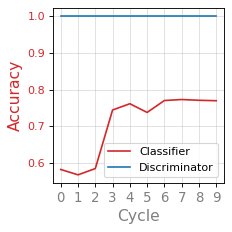

In [20]:
R.plot() # after 10 runs of GP2

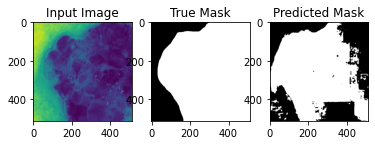

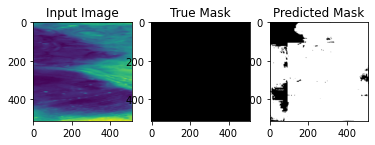

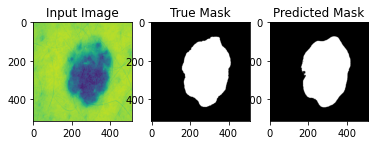

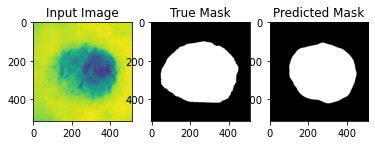

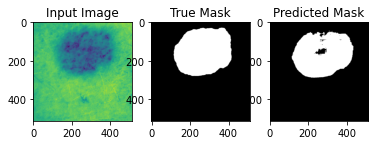

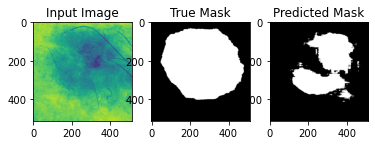

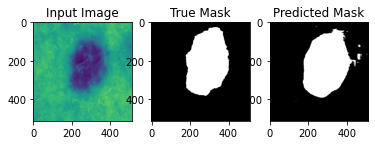

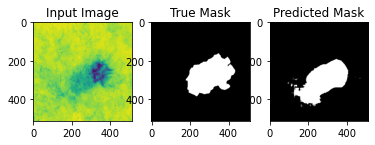

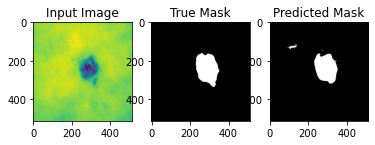

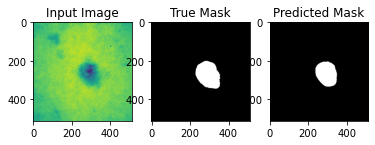

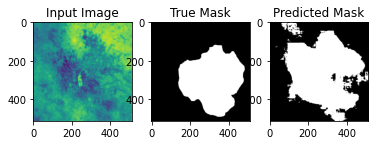

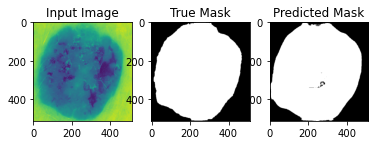

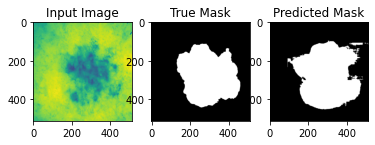

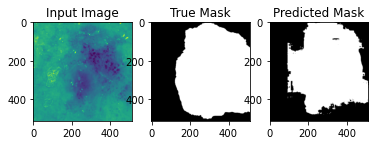

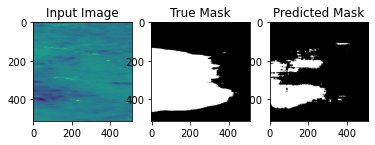

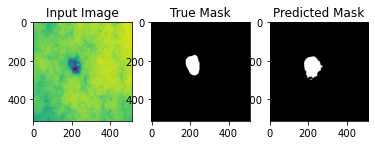

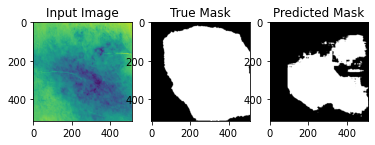

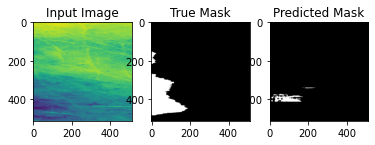

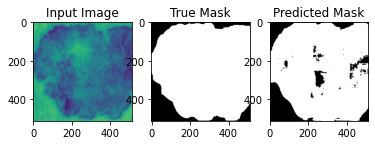

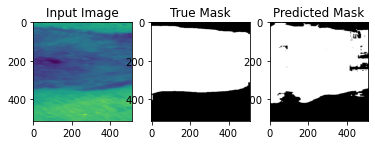

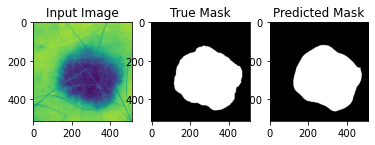

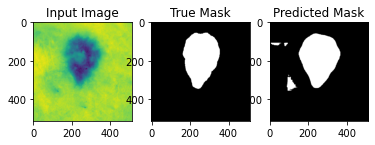

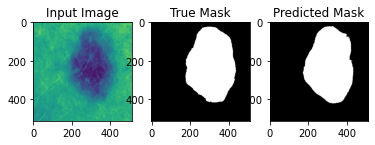

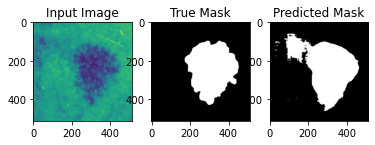

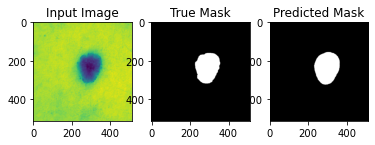

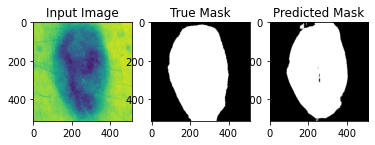

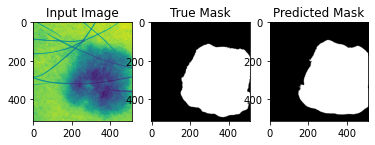

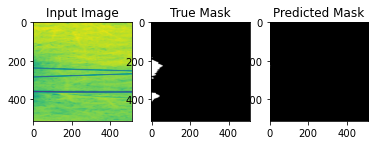

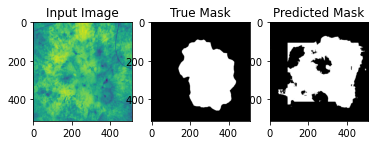

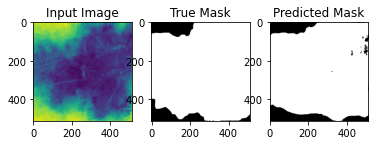

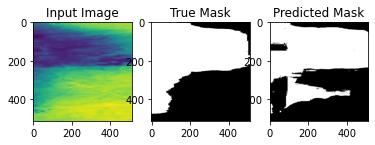

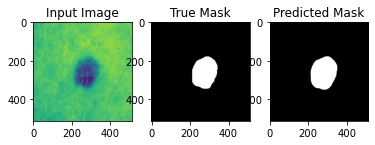

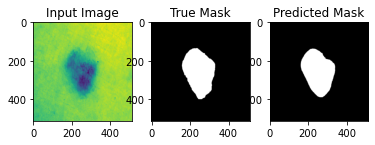

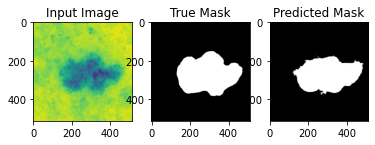

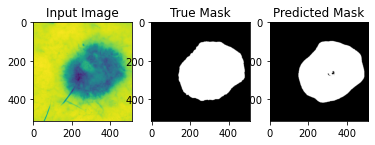

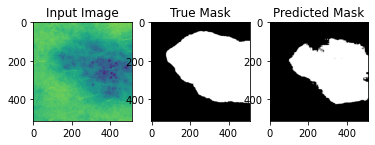

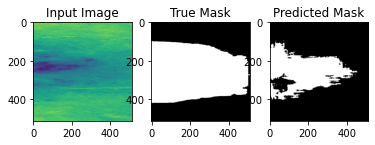

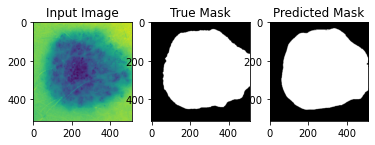

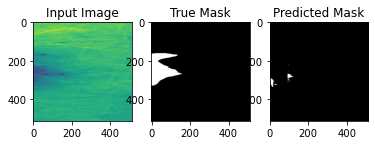

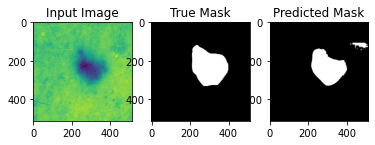

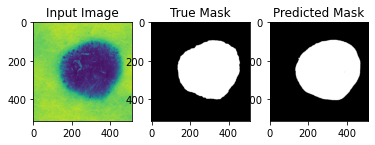

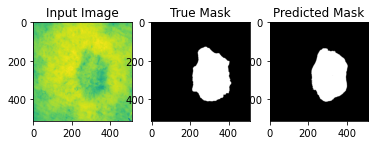

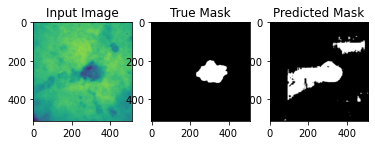

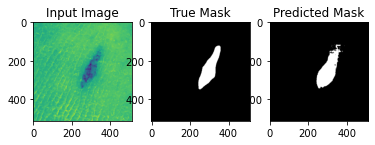

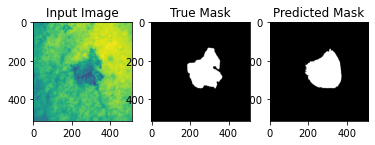

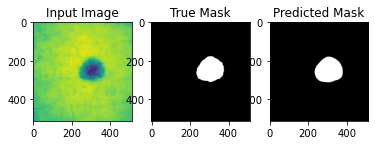

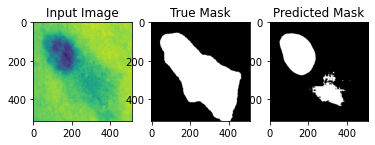

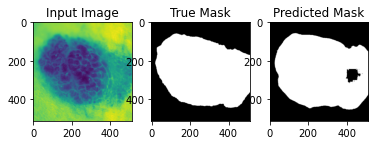

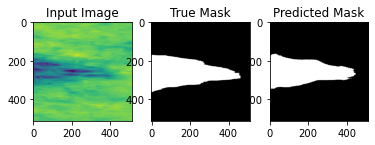

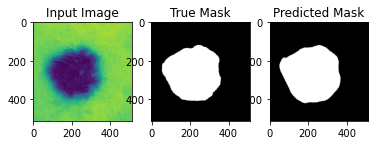

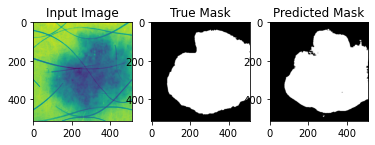

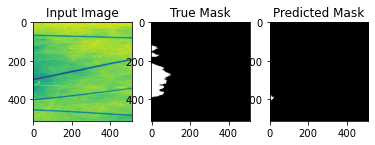

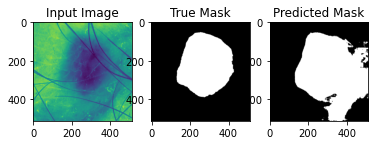

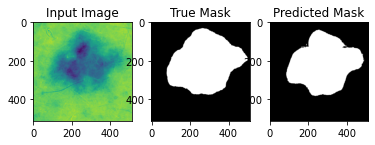

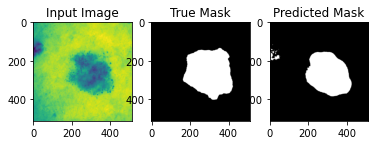

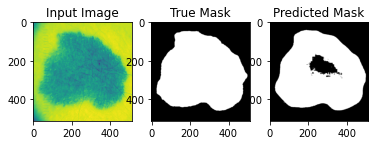

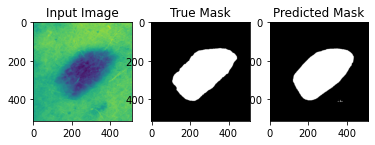

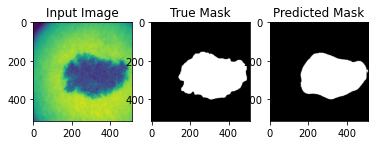

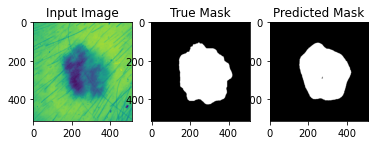

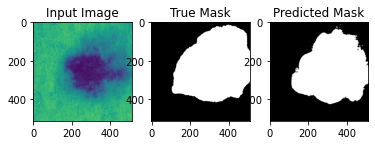

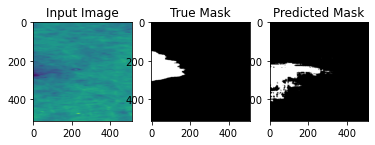

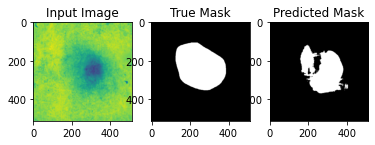

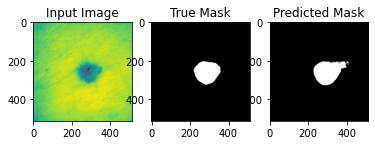

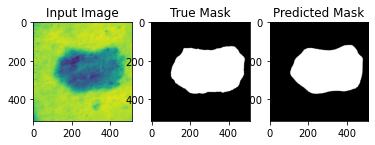

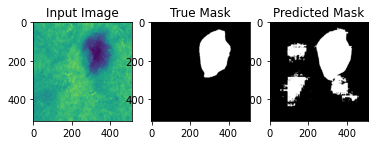

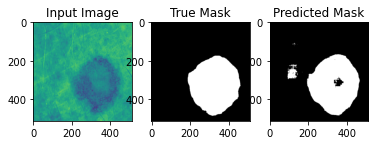

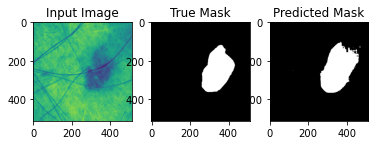

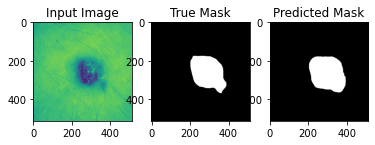

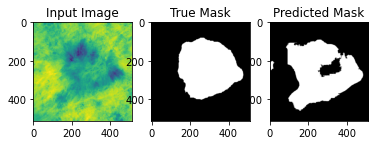

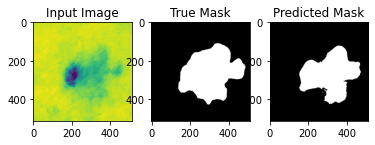

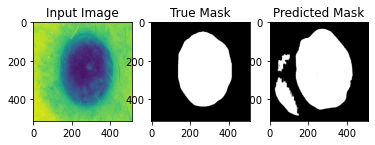

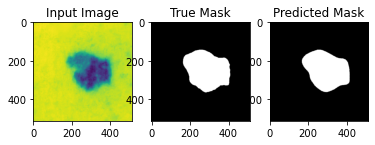

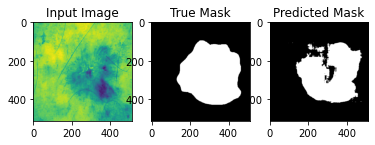

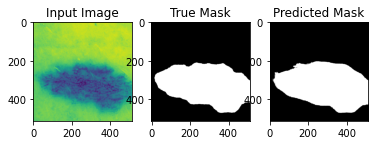

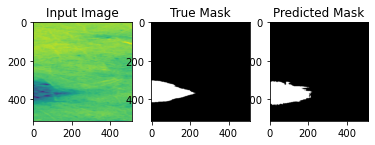

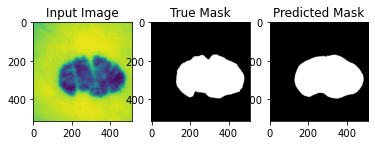

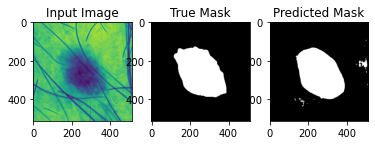

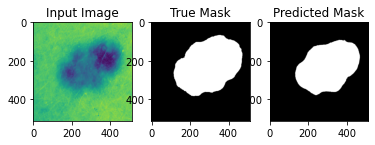

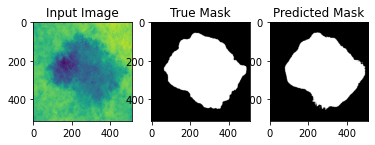

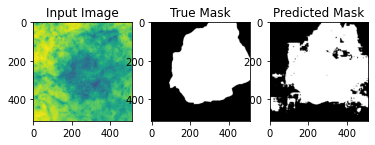

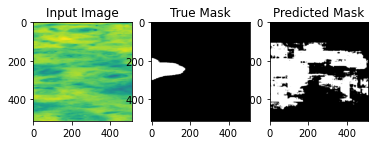

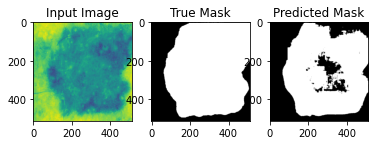

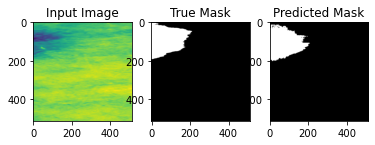

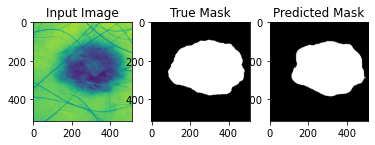

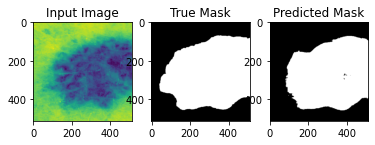

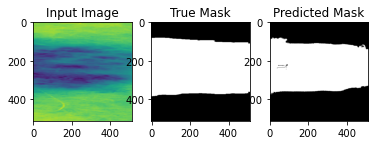

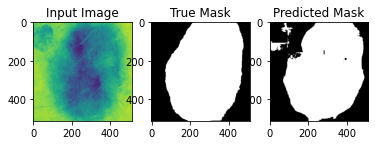

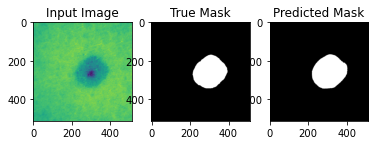

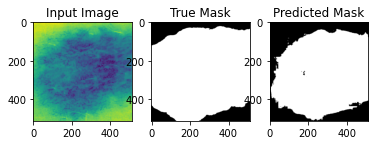

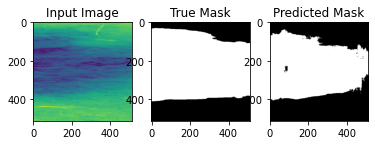

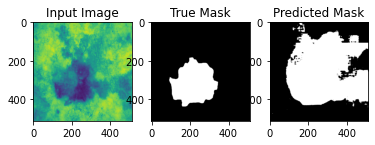

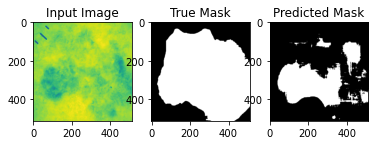

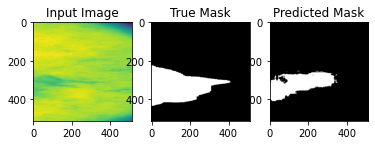

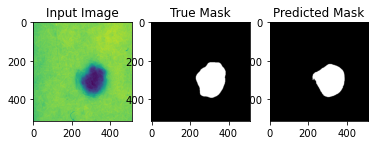

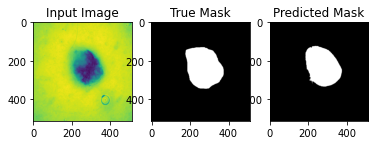

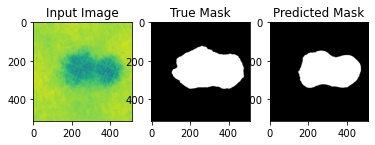

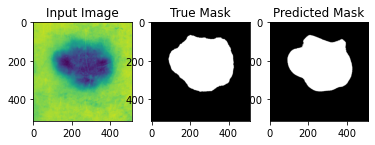

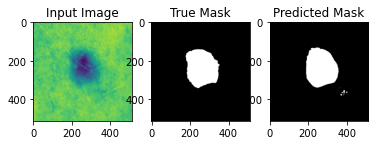

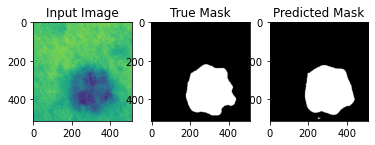

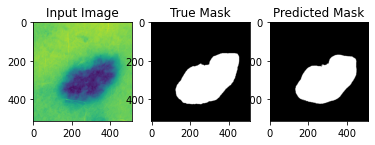

In [21]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 10 runs of GP2